# Visualising climate change in India

In this vignette, we demonstrate the use of varunayan for visualizsing the change in average temeperatre from 1941 to 2024.


In [1]:
import varunayan

df = varunayan.era5ify_geojson(
    request_id="temp_india_yearly",
    variables=["2m_temperature"],
    start_date="1941-1-1",
    end_date="2024-12-31",
    json_file="../data/india.json",
    frequency="yearly",
)

✓ CDS API configuration is already set up and valid.

STARTING ERA5 SINGLE LEVEL PROCESSING
Request ID: temp_india_yearly
Variables: ['2m_temperature']
Date Range: 1941-01-01 to 2024-12-31
Frequency: yearly
Resolution: 0.25°
GeoJSON File: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_temp_geojson.json
✓ All inputs validated successfully

--- Bounding Box ---
✓ Bounding Box calculated:
  North: 35.4940°
  South: 7.9655°
  East:  97.4026°
  West:  68.1766°
  Area:  29.2259° × 27.5285°


--- GeoJSON Mini Map ---

MINI MAP (68.18°W to 97.40°E, 7.97°S to 35.49°N):
┌─────────────────────────────────────────┐
│·········································│
│········■■■■■■■··························│
│··········■■■■■··························│
│·········■■■■■■■·························│
│·······■■■■■■■■■■························│
│····■■■■■■■■■■■■■■■■········■····■■■■■■■·│
│···■■■■■■■■■■■■■■■■■■■■■■■■■·■■■■■■■■····│
│····■■■■■■■■■■■■■■■■■■■■■■■■·····■■■■····│
│·■■■■■■■■■■■■■■■

2025-07-15 23:33:50,711 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:33:52,157 INFO Request ID is 47cf0915-4597-42ef-ac93-f710394b0d89
INFO:ecmwf.datastores.legacy_client:Request ID is 47cf0915-4597-42ef-ac93-f710394b0d89
2025-07-15 23:33:52,367 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:34:01,511 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-07-15 23:34:06,756 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


11816a5996f2ad50a927f9c906761429.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk1.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk1.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk1/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.06 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:34:24,183 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:34:24,875 INFO Request ID is 4d66e7f1-184f-4e6c-8a1f-42b356508e71
INFO:ecmwf.datastores.legacy_client:Request ID is 4d66e7f1-184f-4e6c-8a1f-42b356508e71
2025-07-15 23:34:25,128 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:34:31,090 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-07-15 23:34:34,652 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


e0a0ebf7450e58d35c26985e9ffdf5d2.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk2.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk2.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk2/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.08 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:34:49,959 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:34:51,254 INFO Request ID is 30700db7-a0fc-42b2-800b-ad235716167f
INFO:ecmwf.datastores.legacy_client:Request ID is 30700db7-a0fc-42b2-800b-ad235716167f
2025-07-15 23:34:51,417 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:35:00,202 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


684289f83f9ec5a445f2777d12466f59.zip:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk3.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk3.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk3/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.07 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:35:17,496 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:35:18,091 INFO Request ID is c76ad795-1761-40e2-9cd8-e6a36738f3a9
INFO:ecmwf.datastores.legacy_client:Request ID is c76ad795-1761-40e2-9cd8-e6a36738f3a9
2025-07-15 23:35:18,344 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:35:40,238 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


412b00c7f5eee84fe077883928bc2829.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk4.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk4.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk4/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.08 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:35:53,731 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:35:54,309 INFO Request ID is 91a77c4e-97b6-44b6-86e4-09c112f8fcff
INFO:ecmwf.datastores.legacy_client:Request ID is 91a77c4e-97b6-44b6-86e4-09c112f8fcff
2025-07-15 23:35:54,485 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:36:08,576 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-07-15 23:36:27,908 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


435c337616af70ed2ba0251618388fdd.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk5.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk5.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk5/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.13 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:36:41,825 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:36:42,318 INFO Request ID is 83df80d9-5c9f-4eb6-bab3-89755ba78a55
INFO:ecmwf.datastores.legacy_client:Request ID is 83df80d9-5c9f-4eb6-bab3-89755ba78a55
2025-07-15 23:36:42,464 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:36:51,792 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-07-15 23:37:04,770 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


c03c5d2fe3a0462c9c84d90e39f9a850.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk6.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk6.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk6/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.07 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:37:20,456 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:37:21,032 INFO Request ID is 658e8e96-7eb3-4611-8f5e-0c8830349a4c
INFO:ecmwf.datastores.legacy_client:Request ID is 658e8e96-7eb3-4611-8f5e-0c8830349a4c
2025-07-15 23:37:21,205 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:37:30,042 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


cd6900b6c23a704f4e7066e4233b5242.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk7.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk7.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk7/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.07 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:37:43,683 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:37:44,773 INFO Request ID is 602dd05b-304b-4bb9-8831-538b32dbd1bd
INFO:ecmwf.datastores.legacy_client:Request ID is 602dd05b-304b-4bb9-8831-538b32dbd1bd
2025-07-15 23:37:44,917 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:37:53,697 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


9d5648bc4e64a705ffab07909854d4a6.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk8.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk8.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk8/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.07 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:38:07,216 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:38:07,934 INFO Request ID is 2cc1fb0b-d97a-40ab-8829-1b8479c208fd
INFO:ecmwf.datastores.legacy_client:Request ID is 2cc1fb0b-d97a-40ab-8829-1b8479c208fd
2025-07-15 23:38:08,113 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:38:22,278 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


d5e88404acc5259c4dec5904a8b420ef.zip:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk9.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk9.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk9/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.07 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created loo

2025-07-15 23:38:36,540 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:38:37,300 INFO Request ID is 47ea4164-9a66-44c9-ac18-0df7b4522802
INFO:ecmwf.datastores.legacy_client:Request ID is 47ea4164-9a66-44c9-ac18-0df7b4522802
2025-07-15 23:38:37,481 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:38:46,402 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


316b09b4161591ccc0a3a1ac059b2348.zip:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk10.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk10.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk10/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 108, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.08 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 1402596 rows
  ✓ Created 

2025-07-15 23:39:00,230 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-15 23:39:01,190 INFO Request ID is 53b0a435-6236-443f-a188-6fa501fbe71c
INFO:ecmwf.datastores.legacy_client:Request ID is 53b0a435-6236-443f-a188-6fa501fbe71c
2025-07-15 23:39:01,497 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-07-15 23:39:07,433 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-07-15 23:39:11,042 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


f81da4a5487d6f886abf9d3c3b5aedac.zip:   0%|          | 0.00/195k [00:00<?, ?B/s]

  ✓ Download completed: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk11.zip
Extracting zip file: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk11.zip
Extracted NetCDF files:
  - /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_india_yearly_chunk11/data_stream-moda_stepType-avgua.nc

Processing downloaded data:
- Found 1 file(s)
  Processing file 1/1: data_stream-moda_stepType-avgua.nc
  ✓ Loaded: Dimensions: Frozen({'valid_time': 8, 'latitude': 111, 'longitude': 117})
Starting optimized filtering process...
→ Extracting unique lat/lon coordinates from dataset...
✓ Found 12987 unique lat/lon combinations
→ Filtering unique coordinates against polygon...
✓ Coordinate filtering completed in 0.07 seconds
  - Points inside: 4446
  - Points outside: 8541
  - Percentage inside: 34.23%
→ Filtering original dataset using inside coordinates...
  Converting dataset to DataFrame...
  ✓ Converted to DataFrame with 103896 rows
  ✓ Created loo

In [2]:
mean_t2m = df["t2m"].mean()

df["dev"] = df["t2m"] - mean_t2m

df.head()

,t2m,year,dev
0,296.386200,1941,-0.202301
1,296.234344,1942,-0.354156
2,295.743408,1943,-0.845093
3,296.361176,1944,-0.227325
4,296.111603,1945,-0.476898


In [8]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


def setup_matplotlib():
    plt.rcParams["figure.dpi"] = 300
    plt.rcParams["savefig.dpi"] = 300
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams["axes.labelweight"] = "normal"

    plt.rcParams["mathtext.fontset"] = "custom"
    plt.rcParams["mathtext.rm"] = "Arial"
    plt.rcParams["mathtext.it"] = "Arial:italic"
    plt.rcParams["mathtext.bf"] = "Arial:bold"


setup_matplotlib()

In [4]:
norm = mcolors.Normalize(vmin=df["dev"].min(), vmax=df["dev"].max())

In [5]:
cmap = plt.colormaps["coolwarm"]

In [6]:
colors = cmap(norm(df["dev"]))

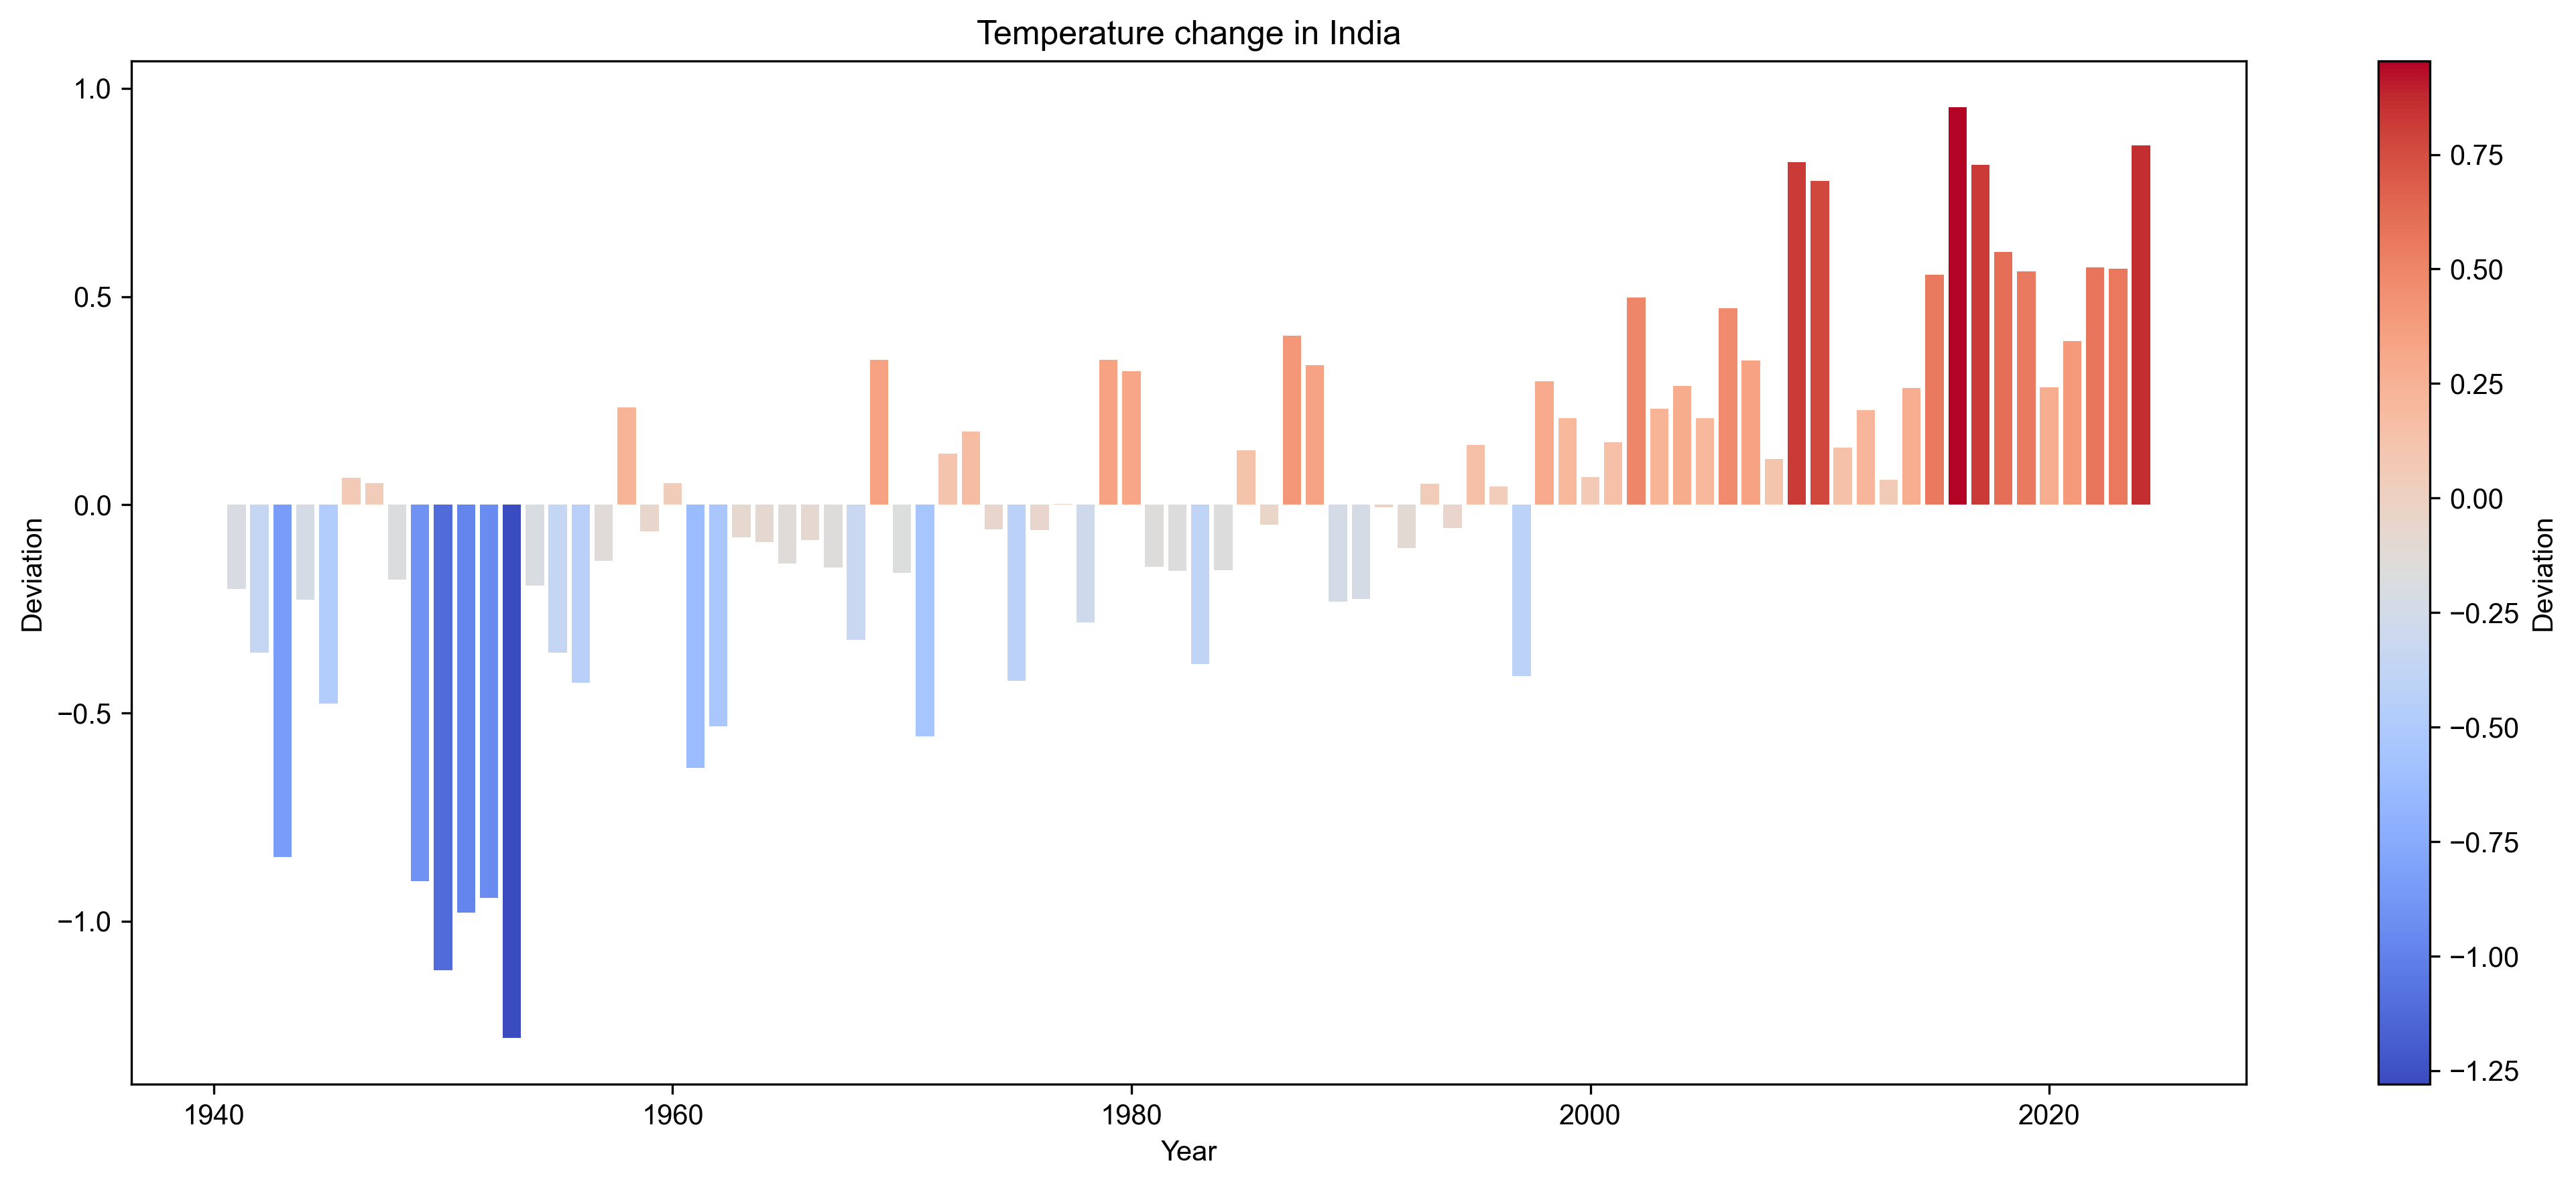

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(df["year"], df["dev"], color=colors)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(df["dev"].values)

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Deviation")

ax.set_xlabel("Year")
ax.set_ylabel("Deviation")
ax.set_title("Temperature change in India")

plt.tight_layout()
plt.show()